In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 1
import numpy as np
import copy

from CPE730 import Problem, BasicPSO


# Load Data 

In [2]:
problem = Problem.Problem()
problem.load_test() # for testing
#problem.load()

# Training Parameters 

In [3]:
swarm_dim = problem.get_problem_dim()
swarm_min, swarm_max = problem.get_solution_limits()
ninit = 1
init_costs = np.zeros(ninit)
psoArgs = {
    'nswarm': 20,
    'swarm_dim': swarm_dim,
    'epochs': 100,
    'chi': -1,
    'rate_cog': 2.05,
    'rate_soc': 2.05,
    'K': 5.0,
    'Wup': 1.2,
    'Wlo': 0.2,
    'Wstep': 25,
    'swarm_max': swarm_max,
    'swarm_min': swarm_min,
    'speed_lim': -1,
    'trn_nproc': 2
}

best_pso = None
best_cost = 1e20
for iinit in range(ninit):
    print('Initialization: ', iinit)
    mypso = BasicPSO.PSO(psoArgs)
    mypso.cost_func = Problem.cost_function
    mypso.initialize()
    (solution_idx, sol_cost) = mypso.train(problem.get_info())
    print("\tSolution found with cost: ", sol_cost)
    init_costs[iinit] = sol_cost
    if best_cost > sol_cost:
        best_cost = sol_cost
        best_pso = copy.deepcopy(mypso)
mypso = best_pso
opt_solution = mypso.swarm_best[-1]

Initialization:  0
PSO Training started...
Total Time: 0.03
	Rate: 24.58
Total Time: 0.02
	Rate: 17.78
Total Time: 0.02
	Rate: 22.55
Total Time: 0.02
	Rate: 19.99
Total Time: 0.02
	Rate: 23.09
Total Time: 0.02
	Rate: 21.67
Total Time: 0.02
	Rate: 19.34
Total Time: 0.02
	Rate: 18.96
Total Time: 0.02
	Rate: 23.28
Total Time: 0.03
	Rate: 19.78
Total Time: 0.02
	Rate: 18.58
Total Time: 0.02
	Rate: 22.40
Total Time: 0.02
	Rate: 18.28
Total Time: 0.02
	Rate: 24.55
Total Time: 0.02
	Rate: 20.88
Total Time: 0.02
	Rate: 19.77
Total Time: 0.02
	Rate: 20.51
Total Time: 0.03
	Rate: 18.58
Total Time: 0.02
	Rate: 19.34
Total Time: 0.03
	Rate: 18.47
Total Time: 0.04
	Rate: 19.35
Total Time: 0.05
	Rate: 16.83
Total Time: 0.05
	Rate: 16.60
Total Time: 0.04
	Rate: 16.06
Total Time: 0.04
Total Time: 0.04
	Rate: 32.28
	Rate: 23.46
Total Time: 0.04
	Rate: 14.71
Total Time: 0.05
	Rate: 17.58
Total Time: 0.05
	Rate: 14.44
Total Time: 0.06
	Rate: 40.14
Total Time: 0.07
	Rate: 43.48
Total Time: 0.06
	Rate: 43.

# Plot Training Aspects 

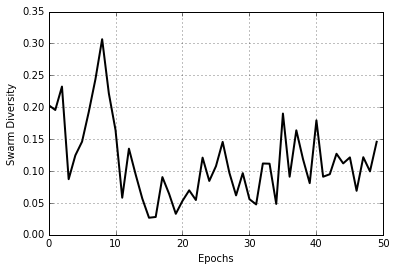

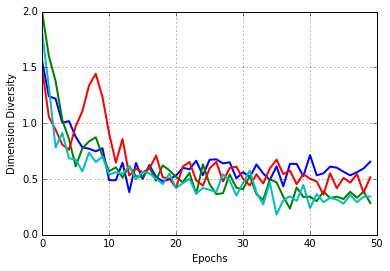

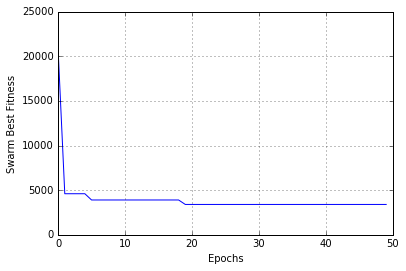

In [61]:
plt.figure()
plt.plot(mypso.global_diversity, 'k', lw=2)
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Swarm Diversity')
plt.figure()
plt.plot(mypso.diversity, lw=2)
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Dimension Diversity')
plt.figure()
plt.plot(mypso.fitness)
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Swarm Best Fitness')

# Plot Solution On Map 

In [37]:
mypso.cost_func(opt_solution, problem.get_info())

2400.0

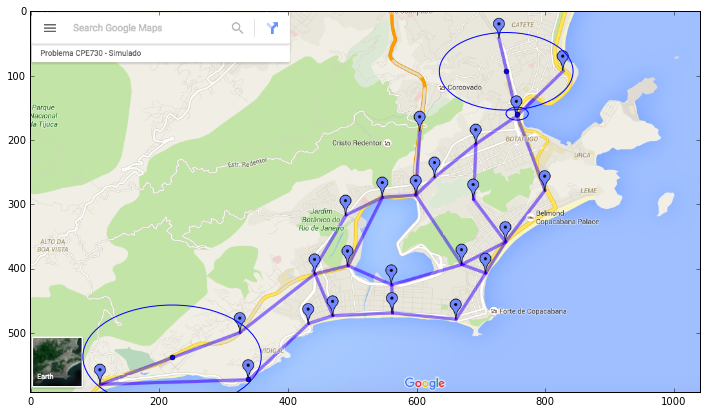

In [38]:
# PLOT MAP
plt.figure(figsize=(12,8))
problem.plot_map()
ax = plt.axis()
# PLOT BASIC PSO SOLUTION
problem.plot_solution(opt_solution, 'b')
plt.axis(ax);

# Animated GIF (must have imagemagick installed)

In [ ]:
problem.plot_swarm_evolution(mypso.swarm_best, 'swarm_evolution_ipynb.gif')